*Bienvenido a mi modelo convolucional capaz de identificar cuando es un perro y cuando es un gato*

In [1]:
#Importamos las librerias que utilizaremos
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from glob import glob
import os

In [2]:
import requests
import zipfile
import os

# Descargar el archivo
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
r = requests.get(url)

with open("cats_and_dogs_filtered.zip", "wb") as f:
    f.write(r.content)

# Descomprimir el archivo
with zipfile.ZipFile("cats_and_dogs_filtered.zip", "r") as zip_ref:
    zip_ref.extractall(".")

# Verificar el contenido descomprimido
print(os.listdir("cats_and_dogs_filtered"))

['train', 'validation', 'vectorize.py']


In [3]:
#obtenemos las rutas de las imagenes de entrenamiento y validación
train_dir = "cats_and_dogs_filtered/train"
validation_dir = "cats_and_dogs_filtered/validation"

Una vez obtenido las rutas pasaremos a obtener los datos e imagenes, tambien procederé a realizar la normalizacion de las imagenes

In [4]:
#importo ImageDataGenerator lo cual me ayudara a realizar la normalizacion
from keras.preprocessing.image import ImageDataGenerator

#instanciamos una variable y realizamos un reescalado
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

Almacenamos las imagenes ya normalizadas y las clases(estas en un diccionario)

In [5]:
#Marcamos la ruta de las imagenes, el tipo de formato que las queremos, los lotes y el tipo de etiquetas
train_gen = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(200,200),
        batch_size=20,
        class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [6]:
valid_gen = valid_datagen.flow_from_directory(
        directory=validation_dir,
        target_size=(200,200),
        batch_size=20,
        class_mode='binary'
)

Found 1000 images belonging to 2 classes.


Preparacion del modelo

Comenzare con la preparacion de la red convolucional 

In [7]:
#llamamos las librerias que utilizaremos
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [8]:
#Creamos el modelo con la clase Sequential
model = Sequential()

In [9]:
#comenzaremos a preparar las capaz convolucionales
model.add(Conv2D(filters=8, kernel_size=(4, 4), strides=1, padding='same', activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(Conv2D(filters=16, kernel_size=(4, 4), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(4, 4), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

In [10]:
#agregamos una capa Flatten
model.add(Flatten())

In [11]:
#Ingresamos las capaz neuronales
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))

In [12]:
#Ingresamos la capa final
model.add(Dense(units=1, activation='sigmoid'))

In [13]:
#Copilamos el modelo
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

#Utilizaremos casi todos los parametros utilizados en clases pero haremos una pequeña variación en el parametro de loss.
#Con "binary_crossentropy" podremos tener una perdida binaria y no categorica, lo cual es mas adecuado con respecto al modelo.

In [14]:
#veamos como esta compuesta nuestra red neuronal
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 8)       392       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      2064      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 32)        0

Ahora pasaremos a la parte del *entrenamiento* del modelo

In [28]:
history1 = model.fit(train_gen, steps_per_epoch=100, validation_data=valid_gen, validation_steps=50, epochs=5)

Epoch 1/5
100/100 [==============================] - 8s 80ms/step - loss: 0.6933 - accuracy: 0.4915 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
100/100 [==============================] - 8s 77ms/step - loss: 0.6935 - accuracy: 0.4825 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
100/100 [==============================] - 8s 78ms/step - loss: 0.6934 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
100/100 [==============================] - 8s 81ms/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.4940
Epoch 5/5
100/100 [==============================] - 8s 78ms/step - loss: 0.6933 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy: 0.5000


Vemos que el modelo obtuvo un buen score y que la validacion no se aleja mucho del modelo, eso significa que pudo aprender bien.

Observemos en un grafico la relacion de el entrenamiento y la validacion

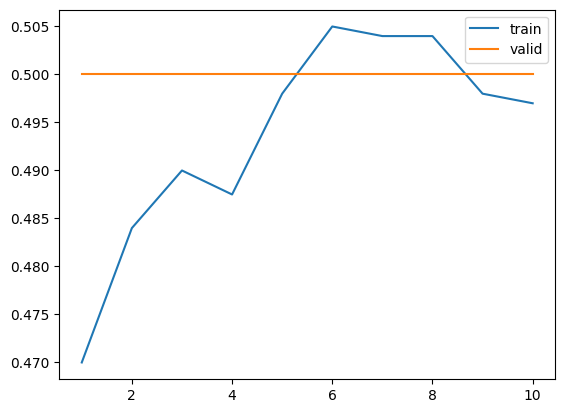

In [16]:
epoch_count = range(1,11)
sns.lineplot(x=epoch_count,  y=history1.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history1.history['val_accuracy'], label='valid')
plt.show()

Probaremos al modelo con imagenes de prueba, veamos si puede reconocer los animales.

In [17]:
#obtenemos la direccion de las imagenes
test_dir = "test"

La carpeta test la creé especialmente para las pruebas de este modelo y del proximo modelo de transfer learning.

In [18]:
#instanciamos la variables y realizamos el mismo escalado
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
#Marcamos la ruta de las imagenes y las normalizamos
test_gen = test_datagen.flow_from_directory(
        directory=test_dir,
        target_size=(200,200),
        batch_size=1,
        class_mode='binary',
        shuffle=False
)

Found 10 images belonging to 2 classes.


In [29]:
#evaluamos el modelo
loss, accuracy = model.evaluate(test_gen,steps=len(test_gen))
print('perdida: ',loss)
print('score: ', accuracy)

10/10 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000
perdida:  0.6931750774383545
score:  0.5


Vemos que el score de la evaluacion es bastante bajo, ahora predeciremos y veremos los resultados.

In [21]:
#realizamos la predicción
y_predic = model.predict(test_gen,steps=len(test_gen))

10/10 [==============================] - 0s 8ms/step


In [22]:
#Creamos la variable pero binaria
y_predic = np.where(y_predic > 0.5, 1, 0)

In [23]:
#obtenemos las clases reales
y_test = test_gen.classes

Obteniendo las variables podemos realizar una matriz de confusion 

In [24]:
#importamos las herramientas a utilizar
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
#creamos la matriz y la matriz display
cm = confusion_matrix(y_test,y_predic)
cmd = ConfusionMatrixDisplay(cm)

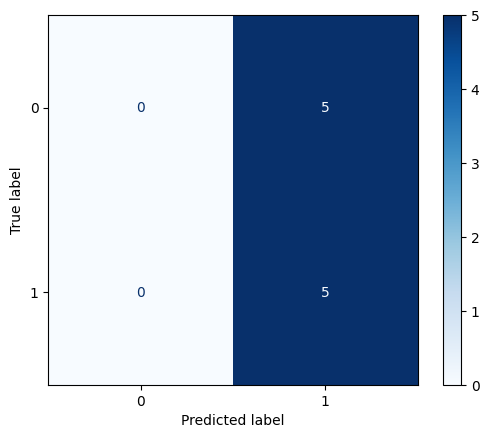

In [26]:
#ploteamos la matriz display
cmd.plot(cmap='Blues')
plt.show()

Realizare una figura para ver cada imagen y su clasificacion asi vemos bien en que imagenes se equivocó el modelo.

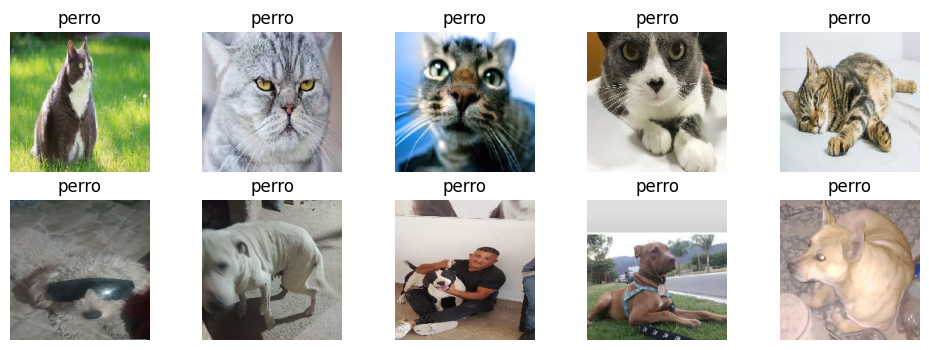

In [27]:
fig = plt.figure(figsize=(12,4))
for i in range(len(test_gen)):
    #obtenemos la imagen y clase
    img= test_gen.next()[0]
    clas = y_predic[i]
    #Normalizamos las clases
    if clas == 0:
        clas = 'gato'
    else:
        clas = 'perro'
    #Comenzamos a crear nuestra imagen
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(img[0])
    ax.axis('off')
    ax.set_title(clas)
plt.show()